# Assignment #3: Write up a report using BBC text classification data

github repo: https://github.com/SUN-Wenjun/Advanced_Machine_Learning_Assignment/tree/master/Assignment3


In [0]:
import pandas as pd
import numpy as np

## load data

In [0]:
df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.shape

(2225, 2)

## Q1

Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.)  A simple description is fine.

In [5]:
df['category'].value_counts().sort_values()

entertainment    386
tech             401
politics         417
business         510
sport            511
Name: category, dtype: int64

Text(0, 0.5, 'Frequency')

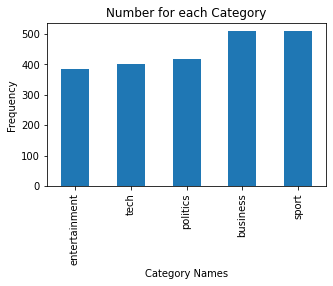

In [6]:
ax = df['category'].value_counts().sort_values().plot(kind='bar',
                                        figsize=(5,3),
                                        title="Number for each Category")
ax.set_xlabel("Category Names")
ax.set_ylabel("Frequency")

There are firve categories of news in the dataset. Entertainment has the least number of articles, which is 386; Sport as the largest number of articles, which is 511. The dataset is generally pretty balanced in terms of catergory.             

## Q2

Preprocess your data such that each document in the data is represented as a sequence of equal length.

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X = df['text'].tolist()

LE = LabelEncoder()
y = LE.fit_transform(df['category'])
y = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Tokenize the data into one hot vectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 200  # We will cut reviews after 200 words
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train) # converts words in each text to each word's numeric index in tokenizer dictionary.

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(y_train)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

X_train = data
y_train = labels

Found 26895 unique tokens.
Shape of data tensor: (1780, 200)
Shape of label tensor: (1780, 5)


In [0]:
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(y_test)

## Q3

Use the data to fit separate models to each of the following architectures

* A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

* B. A model using an Embedding layer with Conv1d Layers

* C. A model using an Embedding layer with one sequential layer (LSTM or GRU)

* D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

* E. A model using an Embedding layer with bidirectional sequential layers

* F. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

In [24]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

### A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

In [26]:
# Let's start with a model that ignores the sequential steps that make up each observation
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Specify the size of your vocabulary (i.e.-10,000 terms)
# Specify the number of features you want to extract via fitting weights to your embedding matrix.
# We also specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs 
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 8005      
Total params: 88,005
Trainable params: 88,005
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 0s 190us/step - loss: 1.5960 - acc: 0.2753 - val_loss: 1.5794 - val_acc: 0.3287
Epoch 2/20
1424/1424 [==============================] - 0s 128us/step - loss: 1.5142 - acc: 0.5948 - val_loss: 1.5152 - val_acc: 0.5084
Epoch 3/20
1424/1424 [==============================] - 0s 134us/step - loss: 1.3639 - acc: 0.7521 - val_loss: 1.3590 - val_acc: 0.6264
Epoch 4/20
1424/1424 [==============================] - 0s 124us/step - loss: 1.0871 - acc: 0.8287 - val_loss: 1.1083 - val_acc: 0.6910
Epoch 5/20
1424/1424 [==============================] - 0s 120us/step - loss: 0.7745 - acc: 0.8947 - val_loss: 0.8922 - val_acc: 0.7472
Epoch 6/20
1424/1424 [==============================] - 0s 124us/step - loss: 0.5301 - acc: 0.9417 - val_loss: 0.7431 - val_acc: 0.8034
Epoch 7/20
1424/1424 [==============================] - 0s 138us/step - loss: 0.3676 - acc: 0.9698 - val_loss: 0.6448 - val_acc: 0.8062
E

In [27]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 89us/step


[0.4546651328547617, 0.8382022380828857]

### B. A model using an Embedding layer with Conv1d Layers

In [30]:
# Use 1D Conv layer rather than RNN or LSTM or GRU to fit model

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) #
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation='softmax'))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 128)          1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 194, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 32, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 165       
Total params: 1,316,069
Trainable params: 1,316,069
Non-trainable params: 0
___________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 5s 3ms/step - loss: 1.6096 - acc: 0.1945 - val_loss: 1.6046 - val_acc: 0.2669
Epoch 2/20
1424/1424 [==============================] - 0s 59us/step - loss: 1.5937 - acc: 0.3336 - val_loss: 1.6014 - val_acc: 0.2725
Epoch 3/20
1424/1424 [==============================] - 0s 54us/step - loss: 1.5838 - acc: 0.3764 - val_loss: 1.5987 - val_acc: 0.2837
Epoch 4/20
1424/1424 [==============================] - 0s 58us/step - loss: 1.5752 - acc: 0.3912 - val_loss: 1.5963 - val_acc: 0.2725
Epoch 5/20
1424/1424 [==============================] - 0s 54us/step - loss: 1.5670 - acc: 0.4431 - val_loss: 1.5943 - val_acc: 0.3090
Epoch 6/20
1424/1424 [==============================] - 0s 57us/step - loss: 1.5596 - acc: 0.4501 - val_loss: 1.5928 - val_acc: 0.2893
Epoch 7/20
1424/1424 [==============================] - 0s 54us/step - loss: 1.5524 - acc: 0.4544 - val_loss: 1.5910 - val_acc: 0.2865
Epoch 8/2

In [31]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 190us/step


[1.5781354644325343, 0.2943820357322693]

### C. A model using an Embedding layer with one sequential layer (LSTM or GRU)

In [32]:
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 9s 6ms/step - loss: 1.6101 - acc: 0.2163 - val_loss: 1.5936 - val_acc: 0.2725
Epoch 2/20
1424/1424 [==============================] - 8s 6ms/step - loss: 1.5089 - acc: 0.4031 - val_loss: 1.5814 - val_acc: 0.2640
Epoch 3/20
1424/1424 [==============================] - 8s 6ms/step - loss: 1.3428 - acc: 0.5927 - val_loss: 1.5553 - val_acc: 0.3174
Epoch 4/20
1424/1424 [==============================] - 9s 6ms/step - loss: 1.0957 - acc: 0.7233 - val_loss: 1.6121 - val_acc: 0.3287
Epoch 5/20
1424/1424 [==============================] - 9s 6ms/step - loss: 0.7717 - acc: 0.8624 - val_loss: 1.6147 - val_acc: 0.3146
Epoch 6/20
1424/1424 [==============================] - 8s 6ms/step - loss: 0.4477 - acc: 0.9579 - val_loss: 1.6909 - val_acc: 0.3455
Epoch 7/20
1424/1424 [==============================] - 9s 6ms/step - loss: 0.2140 - acc: 0.9937 - val_loss: 1.7598 - val_acc: 0.3511
Epoch 8/20
1424

In [33]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 0s 574us/step


[1.8861691231138251, 0.31910112500190735]

### D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

In [34]:
# Stacked RNN layers

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 32s 23ms/step - loss: 1.6375 - acc: 0.2198 - val_loss: 1.6646 - val_acc: 0.1545
Epoch 2/20
1424/1424 [==============================] - 32s 23ms/step - loss: 1.4489 - acc: 0.3827 - val_loss: 1.5713 - val_acc: 0.2809
Epoch 3/20
1424/1424 [==============================] - 31s 22ms/step - loss: 1.0163 - acc: 0.6376 - val_loss: 1.6720 - val_acc: 0.3062
Epoch 4/20
1424/1424 [==============================] - 31s 22ms/step - loss: 0.5289 - acc: 0.8553 - val_loss: 1.9419 - val_acc: 0.3567
Epoch 5/20
1424/1424 [==============================] - 32s 22ms/step - loss: 0.2037 - acc: 0.9684 - val_loss: 2.2005 - val_acc: 0.3511
Epoch 6/20
1424/1424 [==============================] - 31s 22ms/step - loss: 0.0709 - acc: 0.9958 - val_loss: 2.3926 - val_acc: 0.3371
Epoch 7/20
1424/1424 [==============================] - 32s 22ms/step - loss: 0.0296 - acc: 0.9993 - val_loss: 2.5346 - val_acc: 0.3315
E

In [35]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 1s 2ms/step


[4.593122086900004, 0.2247191071510315]

### E. A model using an Embedding layer with bidirectional sequential layers

In [37]:
model = Sequential()
model.add(layers.Embedding(max_words, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=128, 
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 12s 9ms/step - loss: 1.6075 - acc: 0.2219 - val_loss: 1.6045 - val_acc: 0.2163
Epoch 2/20
1424/1424 [==============================] - 12s 8ms/step - loss: 1.6016 - acc: 0.2409 - val_loss: 1.5981 - val_acc: 0.2388
Epoch 3/20
1424/1424 [==============================] - 12s 8ms/step - loss: 1.5952 - acc: 0.2823 - val_loss: 1.5921 - val_acc: 0.2640
Epoch 4/20
1424/1424 [==============================] - 11s 8ms/step - loss: 1.5875 - acc: 0.2879 - val_loss: 1.5857 - val_acc: 0.2921
Epoch 5/20
1424/1424 [==============================] - 12s 8ms/step - loss: 1.5736 - acc: 0.2816 - val_loss: 1.5738 - val_acc: 0.2781
Epoch 6/20
1424/1424 [==============================] - 12s 8ms/step - loss: 1.5607 - acc: 0.2992 - val_loss: 1.5628 - val_acc: 0.3174
Epoch 7/20
1424/1424 [==============================] - 11s 8ms/step - loss: 1.5459 - acc: 0.2942 - val_loss: 1.5613 - val_acc: 0.2949
Epoch 8/

In [38]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 1s 2ms/step


[1.0028762785236487, 0.550561785697937]

### F. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

Model E works best, so I will add dropout to it. 

In [41]:
model = Sequential()
model.add(layers.Embedding(max_words, 32))
model.add(layers.Bidirectional(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=40,  # double epochs 
                    batch_size=128, 
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/40
1424/1424 [==============================] - 14s 10ms/step - loss: 1.6056 - acc: 0.2177 - val_loss: 1.6012 - val_acc: 0.2725
Epoch 2/40
1424/1424 [==============================] - 13s 9ms/step - loss: 1.5988 - acc: 0.2507 - val_loss: 1.5957 - val_acc: 0.2163
Epoch 3/40
1424/1424 [==============================] - 14s 10ms/step - loss: 1.5921 - acc: 0.2367 - val_loss: 1.5881 - val_acc: 0.3118
Epoch 4/40
1424/1424 [==============================] - 14s 9ms/step - loss: 1.5830 - acc: 0.2837 - val_loss: 1.5852 - val_acc: 0.2163
Epoch 5/40
1424/1424 [==============================] - 14s 10ms/step - loss: 1.5688 - acc: 0.2654 - val_loss: 1.5724 - val_acc: 0.2921
Epoch 6/40
1424/1424 [==============================] - 14s 10ms/step - loss: 1.5563 - acc: 0.2949 - val_loss: 1.5462 - val_acc: 0.3848
Epoch 7/40
1424/1424 [==============================] - 14s 10ms/step - loss: 1.5530 - acc: 0.3188 - val_loss: 1.5442 - val_acc: 0.3427
Epo

In [42]:
model.evaluate(X_test, y_test)

445/445 [==============================] - 1s 2ms/step


[0.5971800802798753, 0.8044943809509277]

## Q4 

Discuss 1) which model(s) performed best and speculate about 2) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)

I am actually pretty surprised that model A (the one with an embedding layer and dense layers but no layers meant for sequential data) turned out to preform very well too. It had an accuracy of 0.83 on the test set, higher than all other models. It worth noting that, the LSTM model with dropout also preform good - an accuracy of 0.80. 

As for the reason why the vanilla model prefomed so well, honestly, I am not sure. My guess is that this dataset is not very large, so more complex models may be an overfkill. The good preformance of the LSTM with dropout model also support this guess - the dropout deals with overfitting and it greatly improve the preformance. 

For next step, I would probably try pretrained embeddings. I know there are some pretaining embedding is built particularly for news. On the other hand, I don't think more layers, combining Conv1D with LSTM, or adding more LSTM hidden nodes. Because too complex models would be more vulnerable to over-fitting. 